# Importing Librairies

In [21]:
import pandas as pd
import os
import json
import seaborn as sns
import tokenize
import io 

Path to data

In [2]:
DATA_PATH="../data_/"

Creating a dataframe with ntk's cells

In [3]:
new_df = pd.DataFrame(columns=["cell_type","source","title"])

Delete raw cells if exist

In [4]:
def delete_raw(new_df,raw_df,counter_raw):
    for i in raw_df.index:
        if raw_df.loc[i]['cell_type'] == 'raw':
            counter_raw +=1
        else :
            new_df.loc[len(new_df)]=raw_df.loc[i]

Transform ntbks == >  one df

In [5]:
def parse_ntb(new_df):
    counter_raw = 0
    test = os.listdir(DATA_PATH)
    for item in test:
        if item.endswith(".py") or item.endswith(".irnb") or item.endswith(".R") or item.endswith(".Rmd"):
            os.remove(os.path.join(DATA_PATH, item))
        else :
            with open(DATA_PATH+item, encoding="utf8") as jsonfile:
                data = json.load(jsonfile)
            raw_df = pd.json_normalize(data['cells'])[["cell_type","source"]]
            raw_df['title'] = item
            delete_raw(new_df,raw_df,counter_raw)
    print("Raw cells :",counter_raw)

In [6]:
parse_ntb(new_df)

Raw cells : 0


In [7]:
new_df

,cell_type,source,title
0,markdown,# House Prices: Advanced Regression Techniques...,1-house-prices-solution-top-1.ipynb
1,markdown,<br>\n### Load packages,1-house-prices-solution-top-1.ipynb
2,code,# This Python 3 environment comes with many he...,1-house-prices-solution-top-1.ipynb
3,markdown,### Load data,1-house-prices-solution-top-1.ipynb
4,code,train = pd.read_csv('../input/house-prices-adv...,1-house-prices-solution-top-1.ipynb
...,...,...,...
13702,code,submission_df,your-first-nlp-competition-submission.ipynb
13703,code,submission_df['target'].value_counts(),your-first-nlp-competition-submission.ipynb
13704,code,submission = submission_df.to_csv('Result.csv'...,your-first-nlp-competition-submission.ipynb
13705,markdown,\n<font size='5' color='red'> if you liked th...,your-first-nlp-competition-submission.ipynb


<AxesSubplot:xlabel='cell_type', ylabel='Count'>

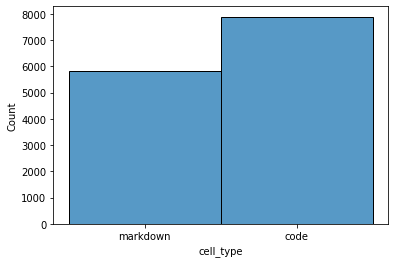

In [8]:
sns.histplot(data=new_df, x="cell_type")

# Number of comments 

In [13]:
def count_comments(new_df):
    counter = 0
    counter_cells =0
    for i in new_df.index:
        c = 0
        if str(new_df.loc[i]['cell_type']) == 'code' :
            for toktype, tok, start, end, line in tokenize.generate_tokens(io.StringIO(str(new_df.loc[i]['source'])).readline):
                # we can also use token.tok_name[toktype] instead of 'COMMENT'
                # from the token module 
                if toktype == tokenize.COMMENT:
                    counter +=1
                    c+=1
            if c!=0:
                counter_cells+=1


    return (counter,counter_cells)


In [14]:
count_comments(new_df)

(9633, 2848)

So we have 2916 code cells that have comments included and 9827 is the total number of comments

Construct new dataframe

In [18]:
def construct_df(new_df):

    new_df_code = pd.DataFrame(columns=["cell_type","source","title"])

    for i in new_df.index:
        c = 0
        if str(new_df.loc[i]['cell_type']) == 'code' :
            for toktype, tok, start, end, line in tokenize.generate_tokens(io.StringIO(str(new_df.loc[i]['source'])).readline):
                # we can also use token.tok_name[toktype] instead of 'COMMENT'
                # from the token module 
                if toktype == tokenize.COMMENT:

                    c+=1
            if c!=0:
                new_df_code.loc[len(new_df_code)] = ['commented code',new_df.loc[i]['source'],new_df.loc[i]['title']]
            else :
                new_df_code.loc[len(new_df_code)]= new_df.loc[i]


        else :
            new_df_code.loc[len(new_df_code)]=new_df.loc[i]

    return new_df_code
            

In [19]:
data = construct_df(new_df)
data

,cell_type,source,title
0,markdown,# House Prices: Advanced Regression Techniques...,1-house-prices-solution-top-1.ipynb
1,markdown,<br>\n### Load packages,1-house-prices-solution-top-1.ipynb
2,commented code,# This Python 3 environment comes with many he...,1-house-prices-solution-top-1.ipynb
3,markdown,### Load data,1-house-prices-solution-top-1.ipynb
4,code,train = pd.read_csv('../input/house-prices-adv...,1-house-prices-solution-top-1.ipynb
...,...,...,...
13702,code,submission_df,your-first-nlp-competition-submission.ipynb
13703,code,submission_df['target'].value_counts(),your-first-nlp-competition-submission.ipynb
13704,code,submission = submission_df.to_csv('Result.csv'...,your-first-nlp-competition-submission.ipynb
13705,markdown,\n<font size='5' color='red'> if you liked th...,your-first-nlp-competition-submission.ipynb


<AxesSubplot:xlabel='cell_type', ylabel='Count'>

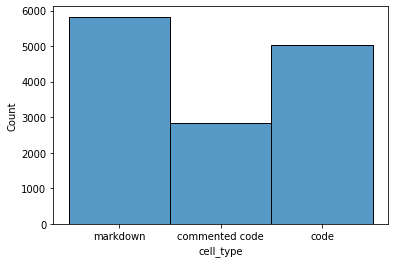

In [20]:
sns.histplot(data=data, x="cell_type")

Still hv to deal with docstrings too !

In [32]:
d = new_df[new_df['cell_type']=='code']
d

,cell_type,source,title
2,code,# This Python 3 environment comes with many he...,1-house-prices-solution-top-1.ipynb
4,code,train = pd.read_csv('../input/house-prices-adv...,1-house-prices-solution-top-1.ipynb
5,code,"print (""Train: "",train.shape[0],""sales, and "",...",1-house-prices-solution-top-1.ipynb
6,code,train.head(),1-house-prices-solution-top-1.ipynb
7,code,test.head(),1-house-prices-solution-top-1.ipynb
...,...,...,...
13700,code,submission_df = pd.DataFrame(),your-first-nlp-competition-submission.ipynb
13701,code,submission_df['id'] = data_clean_test['id']\ns...,your-first-nlp-competition-submission.ipynb
13702,code,submission_df,your-first-nlp-competition-submission.ipynb
13703,code,submission_df['target'].value_counts(),your-first-nlp-competition-submission.ipynb


In [34]:
new_df.isna().sum()

cell_type    0
source       0
title        0
dtype: int64

In [38]:
new_df.to_csv(DATA_PATH+"first_data.csv",index=False)
data.to_csv(DATA_PATH + "second_data.csv", index=False)